In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Digit Recognizer.train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
x=df.iloc[:,1:].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y=df.iloc[:,0].values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)


In [9]:
len(x_train)

33600

In [10]:
len(x_test)

8400

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier_gini=DecisionTreeClassifier(criterion='gini')
classifier_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred_gini=classifier_gini.predict(x_test)
y_pred_gini

array([8, 1, 6, ..., 1, 1, 9], dtype=int64)

In [13]:
y_test

array([8, 1, 6, ..., 1, 1, 9], dtype=int64)

In [14]:
classifier_gini.score(x_train,y_train)

1.0

In [15]:
from sklearn.metrics import accuracy_score,r2_score

In [16]:
accuracy_score(y_pred_gini,y_test)

0.8496428571428571

In [17]:
r2_score(y_pred_gini,y_test)

0.6969925818666338

In [18]:
y_test[100] #actual data 

5

In [19]:
 #predicted data
classifier_gini.predict(x_test[100].reshape(1,784))

array([5], dtype=int64)

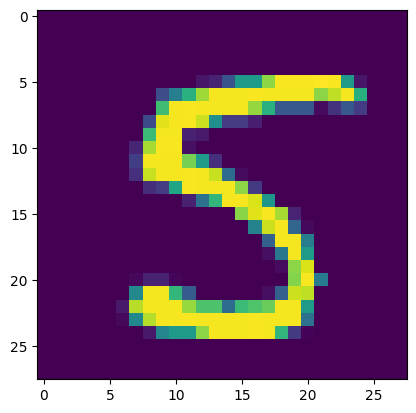

In [20]:
plt.imshow(x_test[100].reshape(28,28))

[Text(0.3967881864014639, 0.9886363636363636, 'x[409] <= 0.5\ngini = 0.9\nsamples = 33600\nvalue = [3331, 3716, 3348, 3466, 3264, 3028, 3334, 3546, 3228\n3339]'),
 Text(0.15523088588286765, 0.9659090909090909, 'x[434] <= 0.5\ngini = 0.816\nsamples = 11144\nvalue = [2783, 3274, 916, 690, 177, 1316, 634, 358, 852, 144]'),
 Text(0.07888009778765771, 0.9431818181818182, 'x[455] <= 5.5\ngini = 0.555\nsamples = 4203\nvalue = [2735, 8, 207, 246, 44, 416, 236, 223, 35, 53]'),
 Text(0.04348343403767249, 0.9204545454545454, 'x[323] <= 8.0\ngini = 0.821\nsamples = 1484\nvalue = [386, 8, 137, 220, 12, 349, 160, 171, 25, 16]'),
 Text(0.017973064052689457, 0.8977272727272727, 'x[489] <= 1.0\ngini = 0.721\nsamples = 743\nvalue = [344, 2, 75, 6, 8, 115, 100, 80, 4, 9]'),
 Text(0.00903382956332549, 0.875, 'x[183] <= 1.5\ngini = 0.509\nsamples = 499\nvalue = [339, 1, 23, 4, 3, 19, 27, 76, 2, 5]'),
 Text(0.004162183254307032, 0.8522727272727273, 'x[570] <= 16.0\ngini = 0.577\nsamples = 120\nvalue = [26, 

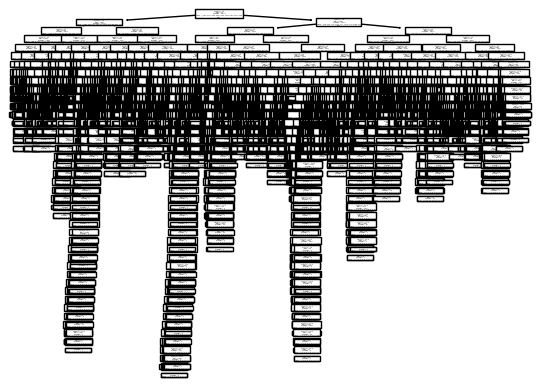

In [34]:
from sklearn import tree
tree.plot_tree(classifier_gini)